<a id = "1"></a><br>
# Ignore this

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

<a id = "1"></a><br>
# Load and Check Data

DataFrames hold the dataset in a tabular format for easy manipulation and analysis. <br>
CSV data is read into 'df' using Pandas' read_csv() function.

In [2]:
train_df = pd.read_csv("./data/train.csv")

### 1. Try to read the test .csv file into test_df

In [3]:
test_df = pd.read_csv("./data/test.csv")
test_PassengerId = test_df["PassengerId"]

In [4]:
print("The Columns of train_df are: ")
train_df.columns

The Columns of train_df are: 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### We can use head() to see the first few rows in the dataframe

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Without looking above, try checking the first few rows of test_df

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Now try checking for a description of test_df's data

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Variable Description
<ol>
  <li><code>PassengerId: unique id number to each passenger</code></li>
  <li><code>Survived: passenger survive(1) or died(0)</code></li>
  <li><code>Pclass: passenger class</code></li>
  <li><code>Name: name</code></li>
  <li><code>Sex: gender of passenger</code></li>
  <li><code>Age: age of passenger</code></li>
  <li><code>SibSp: number of siblings/spouses</code></li>
  <li><code>Parch: number of parents/children</code></li>
  <li><code>Ticket: ticket number</code></li>
  <li><code>Fare: amount of money spent on ticket</code></li>
  <li><code>Cabin: cabin category</code></li>
  <li><code>Embarked: port where passenger embarked ( C = Cherbourg, Q = Queenstown, S = Southampton )</code></li>
</ol>


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Slice Rows and Columsn of DF (Assigmennt)

In [10]:
# Printing the Second Row
train_df.iloc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                              26.0
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [12]:
# Print the 5th Row
train_df.iloc[4]

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                35.0
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

In [13]:
# Print the Sex Column
train_df['Sex']


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [16]:
# Print the Name Column
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Visualization (Assignment)

### Age -- Survived

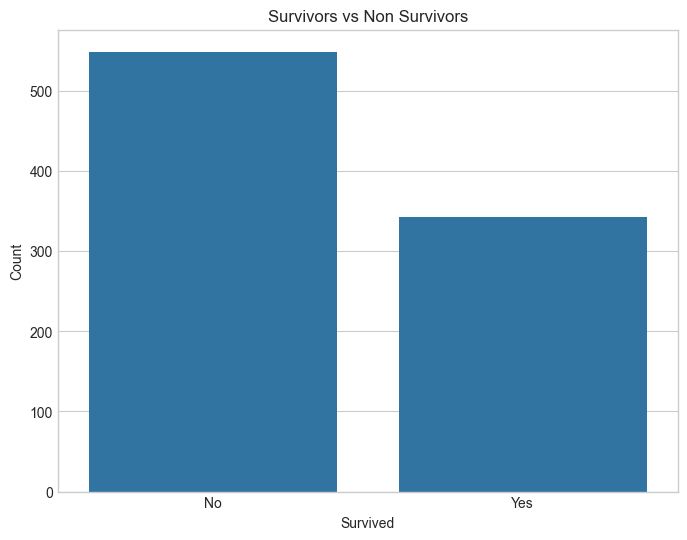

In [17]:
plt.figure(figsize=(8, 6))
# Plot 1: Survivors vs Non Survivors

# Creating a plot for the Survived Column
sns.countplot(x='Survived', data=train_df)

plt.title('Survivors vs Non Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Setting custom tick labels
plt.show()

### Try Plotting Passenger Class

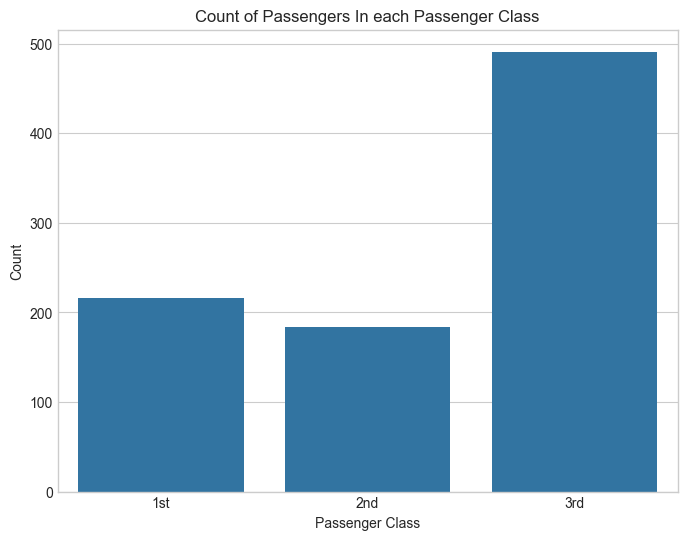

In [19]:
plt.figure(figsize=(8, 6))

# Make the plot for Pclass here:
sns.countplot(x='Pclass', data=train_df)

plt.title('Count of Passengers In each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])  # Setting custom tick labels
plt.show()

### Try it for "Embarked"

<Axes: xlabel='Embarked', ylabel='count'>

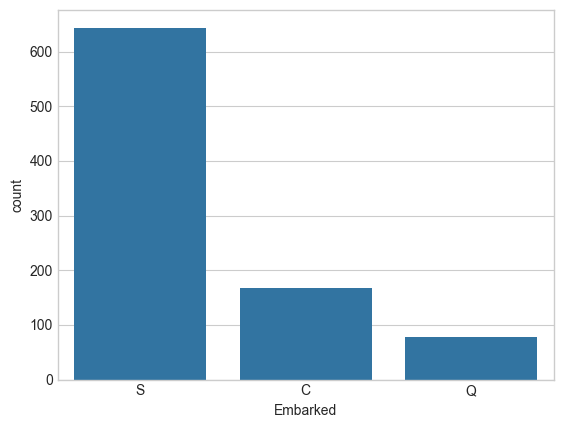

In [20]:
sns.countplot(x='Embarked', data=train_df)

### Try Making a histogram for "Fare"

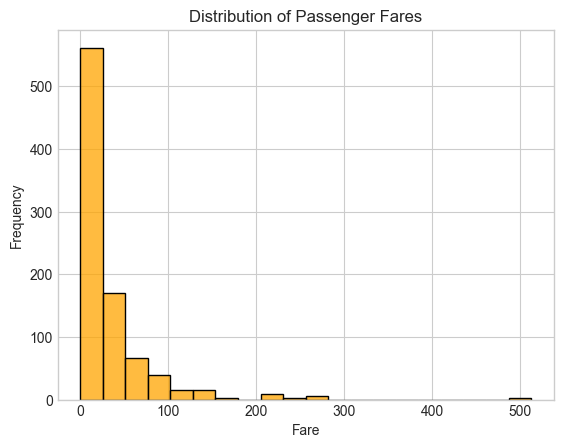

In [23]:
sns.histplot(train_df['Fare'], bins=20, color='orange')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Here is the distplot for "Fare", refer to it after you tried it yourself:

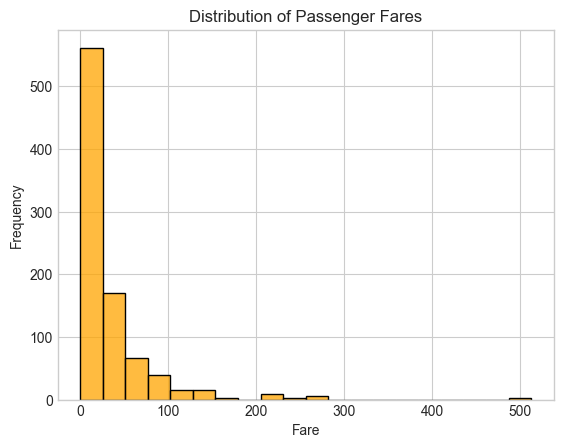

In [22]:
sns.histplot(train_df['Fare'], bins=20, color='orange')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Make a histogram for "Age" (Assignment)

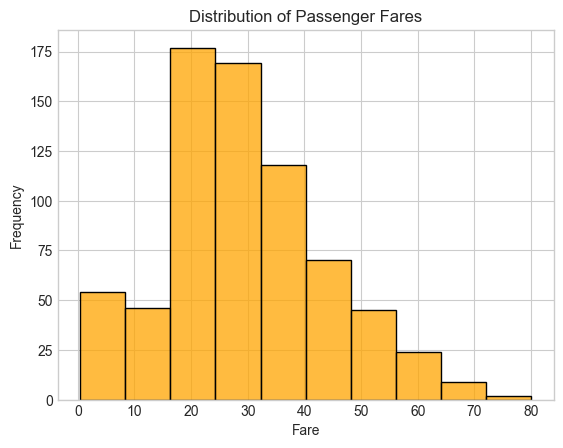

In [27]:
# Create the plot below
sns.histplot(train_df['Age'], bins=10, color='orange')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

<a id = "20"></a><br>
## Fill Missing: Age Feature

In [28]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Try Checking for Null Values in Test Df

In [29]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Run this to fix the Null Values

In [30]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

index_nan_age = list(test_df["Age"][test_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = test_df["Age"][((test_df["SibSp"] == test_df.iloc[i]["SibSp"]) &(test_df["Parch"] == test_df.iloc[i]["Parch"])& (test_df["Pclass"] == test_df.iloc[i]["Pclass"]))].median()
    age_med = test_df["Age"].median()
    if not np.isnan(age_pred):
        test_df["Age"].iloc[i] = age_pred
    else:
        test_df["Age"].iloc[i] = age_med

## Analysing the correlation between the different columns

<Axes: >

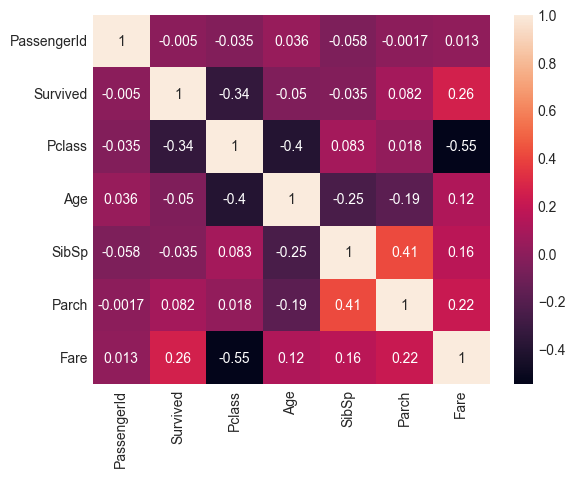

In [46]:
numerical_columns = train_df.select_dtypes(include=[np.number]).columns
sns.heatmap(train_df[numerical_columns].corr(), annot=True)

We see that Fare and Parch are positively correlated with Survived. Similarly, Fare and Class are negatively correlated, in the sense that the higher the higher the Fare, the lower the Class number (Remember that Class 1 < Class 2 < Class 3 in face value).

## Embarked

In [50]:
train_df["Embarked"].head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [45]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

ValueError: Could not interpret value `Embarked` for `x`. An entry with this name does not appear in `data`.

In [44]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [51]:
test_df = pd.get_dummies(test_df, columns=["Embarked"])
test_df.head()

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

## Ticket (Assignment)

In [37]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [38]:
example_ticket = "A/5. 2151"
example_ticket.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [63]:
# tickets = []
# for i in list(train_df.Ticket):
#     if not i.isdigit():
#         tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
#     else:
#         tickets.append("x")
# train_df["Ticket"] = tickets

# Do the same for the test set

tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
test_df["Ticket"] = tickets


AttributeError: 'DataFrame' object has no attribute 'Ticket'

In [41]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [52]:
test_df["Ticket"].head(20)

0               330911
1               363272
2               240276
3               315154
4              3101298
5                 7538
6               330972
7               248738
8                 2657
9            A/4 48871
10              349220
11                 694
12               21228
13               24065
14         W.E.P. 5734
15       SC/PARIS 2167
16              233734
17                2692
18    STON/O2. 3101270
19                2696
Name: Ticket, dtype: object

In [53]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "TcktName")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,TcktName_SOPP,TcktName_SOTONO2,TcktName_SOTONOQ,TcktName_SP,TcktName_STONO,TcktName_STONO2,TcktName_SWPP,TcktName_WC,TcktName_WEP,TcktName_x
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,NaN,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,...,False,False,False,False,False,False,False,False,False,True


In [54]:
test_df = pd.get_dummies(test_df, columns= ["Ticket"], prefix = "TcktName")
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,...,TcktName_SOTON/OQ 392083,TcktName_STON/O 2. 3101268,TcktName_STON/O 2. 3101291,TcktName_STON/O2. 3101270,TcktName_STON/OQ. 369943,TcktName_W./C. 14260,TcktName_W./C. 14266,TcktName_W./C. 6607,TcktName_W./C. 6608,TcktName_W.E.P. 5734
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,False,...,False,False,False,False,False,False,False,False,False,False
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,NaN,False,...,False,False,False,False,False,False,False,False,False,False
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,NaN,False,...,False,False,False,False,False,False,False,False,False,False
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,NaN,False,...,False,False,False,False,False,False,False,False,False,False
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,NaN,True,...,False,False,False,False,False,False,False,False,False,False
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,NaN,False,...,False,False,False,False,False,False,False,False,False,False


<a id = "26"></a><br>
## Pclass

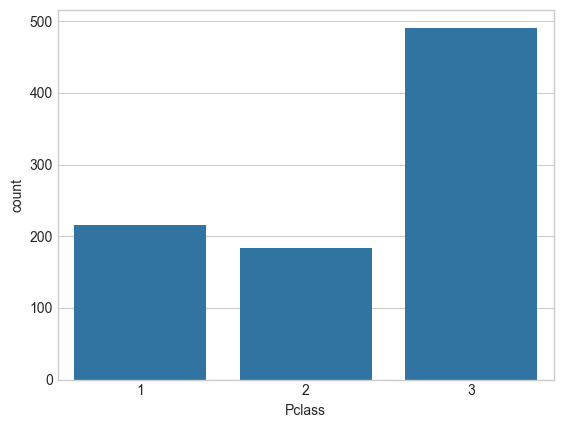

In [55]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [56]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,...,TcktName_SP,TcktName_STONO,TcktName_STONO2,TcktName_SWPP,TcktName_WC,TcktName_WEP,TcktName_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,False,...,False,False,True,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,True,False,False,True


In [57]:
test_df["Pclass"] = test_df["Pclass"].astype("category")
test_df = pd.get_dummies(test_df, columns= ["Pclass"])
test_df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,TcktName_STON/O2. 3101270,TcktName_STON/OQ. 369943,TcktName_W./C. 14260,TcktName_W./C. 14266,TcktName_W./C. 6607,TcktName_W./C. 6608,TcktName_W.E.P. 5734,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,False,True,...,False,False,False,False,False,False,False,False,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,False,True,...,False,False,False,False,False,False,False,False,True,False
3,895,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True


<a id = "27"></a><br>
## Sex

In [58]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,TcktName_STONO2,TcktName_SWPP,TcktName_WC,TcktName_WEP,TcktName_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,False,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,False,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,True,False,False,True,False,True


In [59]:
test_df["Sex"] = test_df["Sex"].astype("category")
test_df = pd.get_dummies(test_df, columns=["Sex"])
test_df.head()

,PassengerId,Name,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,...,TcktName_W./C. 14260,TcktName_W./C. 14266,TcktName_W./C. 6607,TcktName_W./C. 6608,TcktName_W.E.P. 5734,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,7.8292,NaN,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,NaN,False,False,True,...,False,False,False,False,False,False,False,True,True,False
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,NaN,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,895,"Wirz, Mr. Albert",27.0,0,0,8.6625,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,NaN,False,False,True,...,False,False,False,False,False,False,False,True,True,False


## Drop Passenger ID and Cabin (Assignment)

In [60]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [61]:
train_df.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'TcktName_A4', 'TcktName_A5', 'TcktName_AS',
       'TcktName_C', 'TcktName_CA', 'TcktName_CASOTON', 'TcktName_FC',
       'TcktName_FCC', 'TcktName_Fa', 'TcktName_LINE', 'TcktName_PC',
       'TcktName_PP', 'TcktName_PPP', 'TcktName_SC', 'TcktName_SCA4',
       'TcktName_SCAH', 'TcktName_SCOW', 'TcktName_SCPARIS',
       'TcktName_SCParis', 'TcktName_SOC', 'TcktName_SOP', 'TcktName_SOPP',
       'TcktName_SOTONO2', 'TcktName_SOTONOQ', 'TcktName_SP', 'TcktName_STONO',
       'TcktName_STONO2', 'TcktName_SWPP', 'TcktName_WC', 'TcktName_WEP',
       'TcktName_x', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [64]:
# Drop the PassengerId and Cabin columns from the test set
test_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [65]:
# Print the columns of the test set
test_df.columns

Index(['Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'TcktName_110469', 'TcktName_110489',
       ...
       'TcktName_W./C. 14260', 'TcktName_W./C. 14266', 'TcktName_W./C. 6607',
       'TcktName_W./C. 6608', 'TcktName_W.E.P. 5734', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object', length=376)

<a id = "29"></a><br>
# Modeling

In [78]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Train - Test Split (Assignment)

In [34]:
train_df_len = len(train_df)
train_df_len

891

In [70]:

train = train_df[:train_df_len]
test = test_df

# Select all numerical values from train and test
numeric_train = train.select_dtypes(include=[np.number])
numeric_test = test.select_dtypes(include=[np.number]) 


X_train = numeric_train.drop(labels=["Survived",], axis=1)
y_train = numeric_train["Survived"]

# Split the train data into train and test sets with a 1/3 ratio
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(numeric_test))

X_train 596
X_test 295
y_train 596
y_test 295
test 418


## Simple Logistic Regression (Assignment)

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
# Print the accuracy on the training and test set
print("Accuracy on training set:", acc_log_train)
print("Accuracy on test set:", acc_log_test)


Accuracy on training set: 68.62
Accuracy on test set: 68.81


<a id = "32"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [79]:
from sklearn.model_selection import GridSearchCV
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.6996045197740112
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7130508474576271
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.7081073446327684
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.6777683615819209
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.6979943502824858


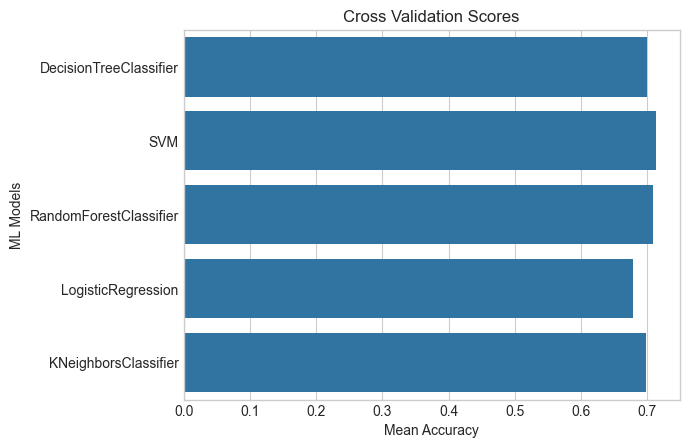

In [82]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
       "LogisticRegression",
       "KNeighborsClassifier"]})

g = sns.barplot(x="Cross Validation Means",y= "ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

## Ensemble Modeling (Assignment)

In [103]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)


# Assuming X_train and y_train are your training data

# Drop null values from X_train and y_train

votingC = votingC.fit(X_train, y_train)

# Print the accuracy score of the voting classifier
print(votingC)
# Drop the null values which are going to cause you an error in the next cell


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=1,
                                                     min_samples_leaf=10,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(C=0.01, random_state=42))],
                 n_jobs=-1, voting='soft')


<a id = "34"></a><br>
## Prediction and Submission

In [104]:
import pandas as pd
from sklearn.ensemble import VotingClassifier

# Assuming votingC is your trained VotingClassifier and numeric_test is your test data
# Assuming test_PassengerId is the corresponding PassengerId for each test data row

# Drop null values from the test data
numeric_test_dropped = numeric_test.dropna()

# Make predictions on the non-null test data
test_survived = pd.Series(votingC.predict(numeric_test_dropped), name="Survived").astype(int)

# Get the PassengerId corresponding to the non-null test data rows
test_PassengerId_dropped = test_PassengerId.loc[numeric_test_dropped.index]

# Concatenate PassengerId and predicted survival outcomes for non-null data
results = pd.concat([test_PassengerId_dropped, test_survived], axis=1)

# Save the results to a CSV file
results.to_csv("titanic.csv", index=False)

# Print the results DataFrame
print(results)


     PassengerId  Survived
0          892.0       0.0
1          893.0       0.0
2          894.0       0.0
3          895.0       0.0
4          896.0       0.0
..           ...       ...
414       1306.0       0.0
415       1307.0       0.0
416       1308.0       0.0
417       1309.0       NaN
152          NaN       0.0

[418 rows x 2 columns]


# Congratulations on finishing the assignment!!

### The submission is the titanic.csv which was just created, and this file which you have modified.